# Non-homothetic Preferences and Redistribution 

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Solve model with "taste for wealth"](#toc2_)    
- 3. [Solve non-homothetic model](#toc3_)    
- 4. [Permanent redistribution](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANCModel import HANCModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [13]:
model = HANCModelClass(name='baseline') # create an instance of the model

In [14]:
model.ss.w = 1 - model.par.alpha 
model.ss.r = 0.04 
model.par.beta = 0.956
model.par.phi_a = 0.0
model.par.sigma = 1.0 

## Solve standard HH problem 

In [15]:
model.solve_hh_ss(do_print=False)
model.simulate_hh_ss(do_print=False)

Plot consumption policy function across permanent income types

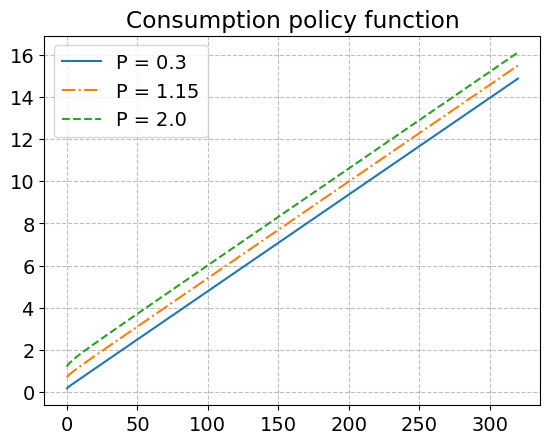

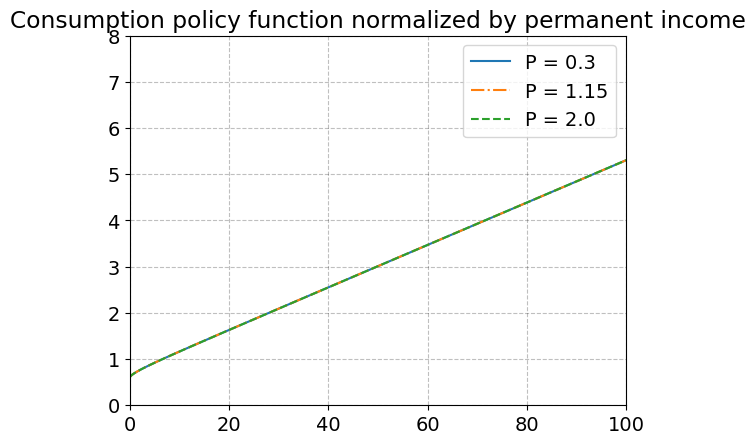

In [16]:
def plot_c(model):
    par = model.par
    ss = model.ss

    c = np.sum(par.z_ergodic[None,:,None]*ss.c,axis=1)
    a = np.sum(par.z_ergodic[None,:,None]*ss.a,axis=1)

    lstyles = ['-', '-.', '--']
    for p in range(par.NP):
        plt.plot(par.a_grid,c[p], label=f'P = {par.P_grid[p]}', linestyle=lstyles[p])
    plt.legend()
    plt.title('Consumption policy function')
    plt.show()

    # normalize by permanent income
    for p in range(par.NP):
        plt.plot(par.a_grid/par.P_grid[p],c[p]/par.P_grid[p], label=f'P = {par.P_grid[p]}', linestyle=lstyles[p])
    plt.xlim([0.,100])
    plt.ylim([0.,8])
    plt.title('Consumption policy function normalized by permanent income')
    plt.legend()
    plt.show()

plot_c(model)

## 2. <a id='toc2_'></a>[Solve model with "taste for wealth (homothetic)"](#toc0_)

We now solve the model with "taste for wealth" in the utility function. You will need to update the Euler equation appropriately in *household_problem.py*.

In [17]:
model.par.sigma_a

1.0

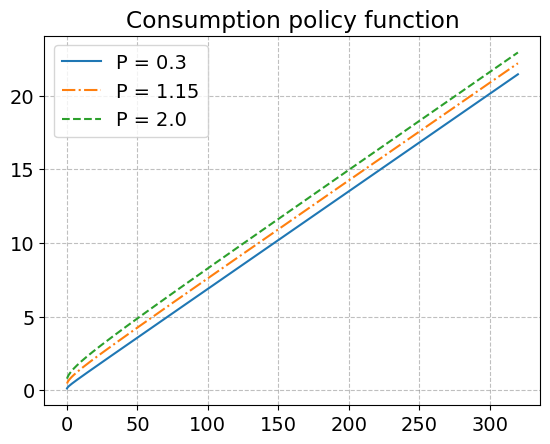

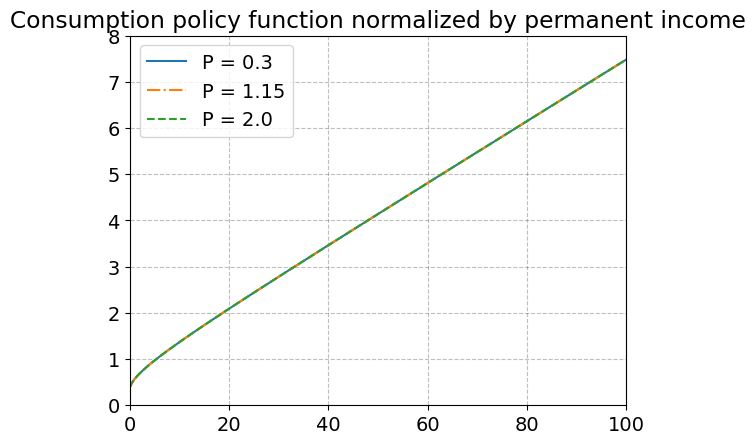

In [27]:
model_TFW = model.copy()
model_TFW.name = 'TFW-H'

model_TFW.par.beta = 0.93
model_TFW.par.phi_a = 0.1
model_TFW.par.sigma = 1.0 
model_TFW.par.sigma_a = 1.0 

model_TFW.solve_hh_ss(do_print=False)
model_TFW.simulate_hh_ss(do_print=False)

plot_c(model_TFW)

## 3. <a id='toc3_'></a>[Solve non-homothetic model](#toc0_)

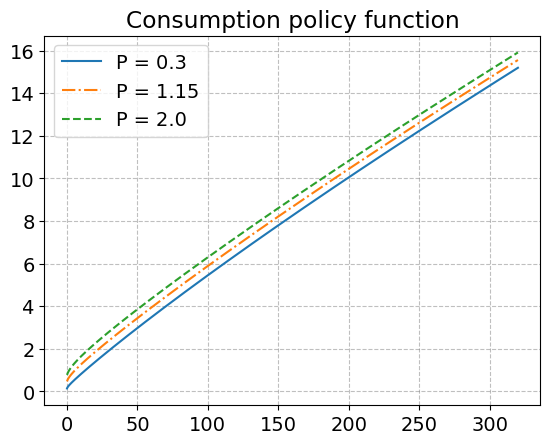

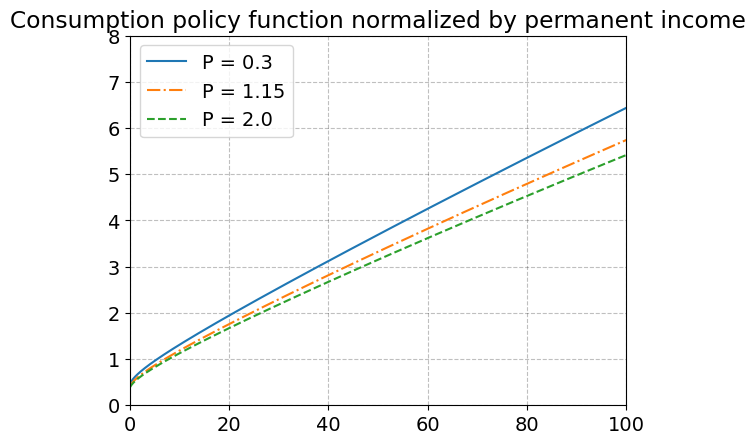

In [34]:
model_NH = model.copy()
model_NH.name = 'TFW-NH'

model_NH.par.beta = 0.93
model_NH.par.phi_a = 0.1
model_NH.par.sigma = 1.0 
model_NH.par.sigma_a = 0.7

model_NH.solve_hh_ss(do_print=False)
model_NH.simulate_hh_ss(do_print=False)

plot_c(model_NH)

## 4. <a id='toc4_'></a>[Permanent redistribution](#toc0_)

What are the effect - in partial equilibrium - of a permanent redistribution from the poorest permanent income households to the richest?


In particular transfer 0.1 ressources from the poorest tertile to the richest tertile (leaving the middle tertile unaltered).

You can implement the transfer by changing *par.P_min* and *par.P_max*.

Aggregate savings before and after redist
5.880359783780781
5.6768910478497645


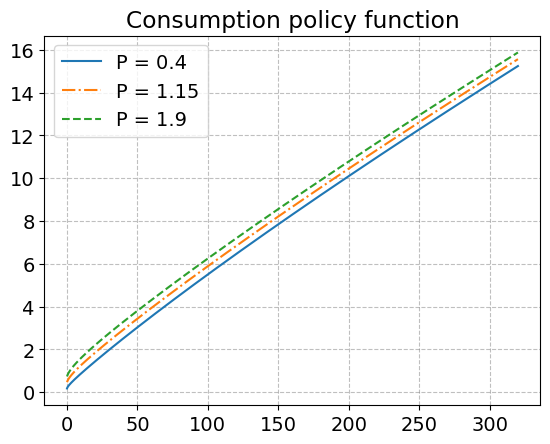

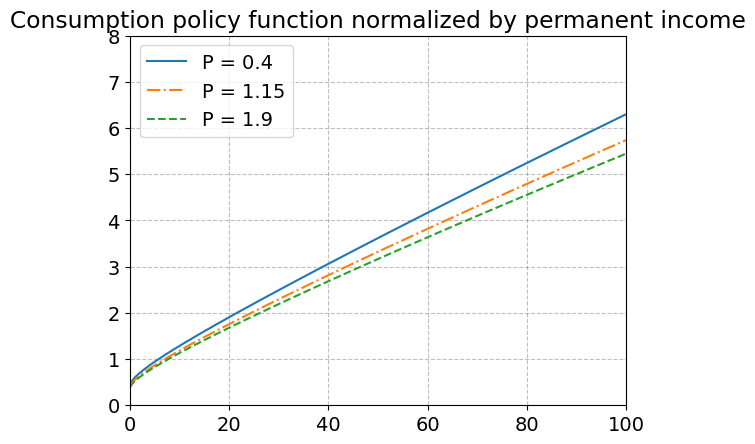

In [42]:
model_RD = model_NH.copy()
model_RD.name = 'RD'

model_RD.par.P_min += 0.1
model_RD.par.P_max -= 0.1

model_RD.solve_hh_ss(do_print=False)
model_RD.simulate_hh_ss(do_print=False)

print("Aggregate savings before and after redist")
print(model_NH.ss.A_hh)
print(model_RD.ss.A_hh)
plot_c(model_RD)

Aggregate savings before and after redist
2.86425274297358
2.864250082801326


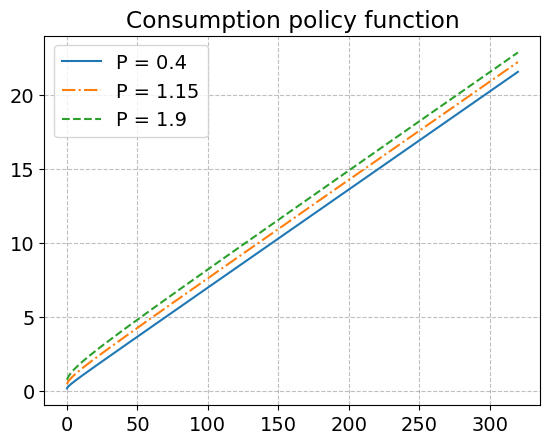

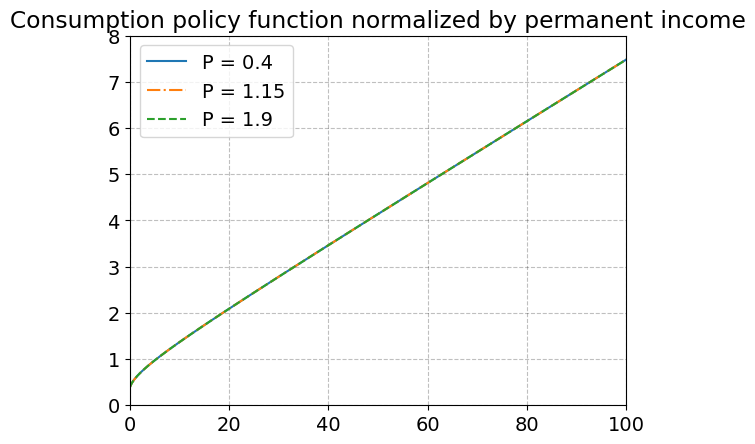

In [43]:
model_TFW_RD = model_TFW.copy()
model_TFW_RD.name = 'TFW-RD'

model_TFW_RD.par.P_min += 0.1
model_TFW_RD.par.P_max -= 0.1

model_TFW_RD.solve_hh_ss(do_print=False)
model_TFW_RD.simulate_hh_ss(do_print=False)

print("Aggregate savings before and after redist")
print(model_TFW.ss.A_hh)
print(model_TFW_RD.ss.A_hh)
plot_c(model_TFW_RD)